# Top 50 Spotify Zenét Tartalmazó Dataset Elemzése

## Könyvtárak Importálása

In [2]:
import pandas as pd # Adatfeldogozáshoz
import numpy as np # Számításokhoz, a pandas is erre épül
import matplotlib.pyplot as plt # Vizualizációhoz
# import math
# import datetime


## Dataset Beolvasás és Kezdeti Adatfelderítés

Közvetlenül egy pandas DataFrame-be olvassuk a fájlt.

In [3]:
dataframe = pd.read_csv('Top-50-musicality-global.csv')

Végzünk némi alap felderítést:

A `describe` különböző statisztikai adatokat mutat az oszlopokra, közép-, minimum-, maximumérték, stb.

In [4]:
dataframe.describe()

,Unnamed: 0,Popularity,Danceability,Acousticness,duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness
count,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000,3589.000000
mean,1794.000000,78.451101,0.688079,0.285637,193871.083031,0.646463,0.019187,5.348008,0.171895,-6.616918,0.503483,0.105122,121.027742,3.906659,0.528968
std,1036.199386,15.242710,0.135642,0.258611,47673.155605,0.163505,0.094564,3.494953,0.123540,2.658782,0.500058,0.097852,27.624052,0.433971,0.228932
min,0.000000,0.000000,0.244000,0.000008,61673.000000,0.024200,0.000000,0.000000,0.015400,-19.518000,0.000000,0.023200,60.038000,1.000000,0.037300
25%,897.000000,67.000000,0.596000,0.079600,162768.000000,0.543000,0.000000,2.000000,0.097400,-8.065000,0.000000,0.039900,99.904000,4.000000,0.359000
50%,1794.000000,83.000000,0.706000,0.188000,187027.000000,0.669000,0.000001,5.000000,0.120000,-6.238000,1.000000,0.063300,118.024000,4.000000,0.524000
75%,2691.000000,90.000000,0.795000,0.441000,219724.000000,0.762000,0.000089,8.000000,0.214000,-4.813000,1.000000,0.131000,139.945000,4.000000,0.720000
max,3588.000000,100.000000,0.974000,0.984000,641941.000000,0.992000,0.901000,11.000000,0.963000,1.155000,1.000000,0.731000,217.969000,5.000000,0.978000


Az `info`-val láthatjuk az oszlopok típusait, amikkel majd mindjárt foglalkoznunk is kell. Valamint több helyen vannak `null` értékű sorok, amiket szintén nem tudunk használni.

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589 entries, 0 to 3588
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3589 non-null   int64  
 1   Country           3589 non-null   object 
 2   Track Name        3583 non-null   object 
 3   Artist Name       3583 non-null   object 
 4   Album Name        3583 non-null   object 
 5   Popularity        3589 non-null   int64  
 6   Date              3589 non-null   object 
 7   Markets           3583 non-null   object 
 8   Danceability      3589 non-null   float64
 9   Acousticness      3589 non-null   float64
 10  duration          3589 non-null   int64  
 11  Energy            3589 non-null   float64
 12  Instrumentalness  3589 non-null   float64
 13  Key               3589 non-null   int64  
 14  Liveness          3589 non-null   float64
 15  Loudness          3589 non-null   float64
 16  Mode              3589 non-null   int64  


## Adattisztítás

Az `Unnamed: 0` oszlopot törölhetjük. Ezután leszűkítjük a datasetet a globális előadókra.

In [6]:
dataframe = dataframe.drop(columns=["Unnamed: 0"])
# dataframe = dataframe.dropna() # kikapcsolom ezt mert lent van egy  jobb megoldás. Enkódoljuk a NaN értékeket számokká és úgy korreláltatjuk őket.
# Ez a sor hibás és mindent kinulláz sajnos:
# dataframe = dataframe.filter(["Global"], axis=0) # Tehát by Country
dataframe = dataframe.query('Country == "Global"')
print(dataframe.describe())


       Popularity  Danceability  Acousticness       duration     Energy  \
count   50.000000     50.000000     50.000000      50.000000  50.000000   
mean    92.260000      0.657500      0.281950  196977.840000   0.631982   
std      4.439204      0.137168      0.291484   40148.814813   0.172986   
min     82.000000      0.419000      0.000418  125040.000000   0.091100   
25%     90.000000      0.546750      0.063050  168676.750000   0.526750   
50%     93.000000      0.654000      0.178000  194693.500000   0.678500   
75%     95.000000      0.779000      0.363000  228907.500000   0.737750   
max    100.000000      0.911000      0.969000  279833.000000   0.944000   

       Instrumentalness        Key   Liveness   Loudness       Mode  \
count         50.000000  50.000000  50.000000  50.000000  50.000000   
mean           0.012644   4.940000   0.179216  -6.666560   0.620000   
std            0.046039   3.501661   0.130146   3.004104   0.490314   
min            0.000000   0.000000   0.0

Néhány oszlopnak, amikkel később esetleg dolgozunk, meg kell változtatni a típusát, hogy annak megfelelő műveleteket tudjunk végezni rajtuk.

In [7]:
dataframe['Country'] = pd.Series(dataframe['Country'], dtype="string")
dataframe['Track Name'] = pd.Series(dataframe['Track Name'], dtype="string")
dataframe['Artist Name'] = pd.Series(dataframe['Artist Name'], dtype="string")
dataframe['Album Name'] = pd.Series(dataframe['Album Name'], dtype="string")
dataframe['Markets'] = pd.Series(dataframe['Markets'], dtype="string")


# Convert Date to datetime type.
dataframe['Date'] = pd.to_datetime(dataframe['Date'], errors='coerce')

# Convert miliseconds to seconds.rt
dataframe['duration'] = pd.Series(dataframe['duration'].transform(lambda x: x / 1000))

# dataframe['duration'] = pd.Series(dataframe['duration'].transform(lambda x: datetime.timedelta(milliseconds=x)))

Ellenőrzés, hogy a változások sikeresek voltak. (Igen)

In [8]:
dataframe.dtypes

Country             string[python]
Track Name          string[python]
Artist Name         string[python]
Album Name          string[python]
Popularity                   int64
Date                datetime64[ns]
Markets             string[python]
Danceability               float64
Acousticness               float64
duration                   float64
Energy                     float64
Instrumentalness           float64
Key                          int64
Liveness                   float64
Loudness                   float64
Mode                         int64
Speechiness                float64
Tempo                      float64
TSignature                   int64
Positiveness               float64
dtype: object

Gyors pillantás a datasetre, a ˙head` visszaadja az adat első n oszlopát, ami a mi esetünkben a default érték vagyis 5.

In [9]:
print(dataframe.head)

<bound method NDFrame.head of    Country                                         Track Name  \
0   Global                               Standing Next to You   
1   Global                                             greedy   
2   Global                                        Si No Estás   
3   Global                Seven (feat. Latto) (Explicit Ver.)   
4   Global  Is It Over Now? (Taylor's Version) (From The V...   
5   Global                                        PERRO NEGRO   
6   Global                                 Paint The Town Red   
7   Global                                       Cruel Summer   
8   Global                                             MONACO   
9   Global                              My Love Mine All Mine   
10  Global                                          Strangers   
11  Global                                              Water   
12  Global  Now That We Don't Talk (Taylor's Version) (Fro...   
13  Global                                       HARLEY QUIN

Sorba rendezzük őket.

In [10]:
dataframe.sort_values(['Artist Name', 'Album Name', 'Popularity'], ascending=False, inplace=True)

Ellenőrizzük, hogy van-e olyan oszlop amiben szerepel null érték valahol.

In [12]:
dataframe.isnull().sum()

Country             0
Track Name          0
Artist Name         0
Album Name          0
Popularity          0
Date                0
Markets             0
Danceability        0
Acousticness        0
duration            0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Loudness            0
Mode                0
Speechiness         0
Tempo               0
TSignature          0
Positiveness        0
dtype: int64

A fenti művelet nem adott vissza null értékes oszlopot de pandas-ban ez nem mindig működik megbízhatóan, ezért végrehajtunk egy null érték törlést is. A numpy-nak és a pandas-nak is van saját null értéke és még a Pythonnak is van egy beépített, ezek bizonyos esetekben, nagyon kis eséllyel de, zavart tudnak okozni.

In [31]:
dataframe.dropna(inplace = True)

A ˙describe˙-bal megnézzük a különbözős statisztikai adatokat az egyes oszlopokról.

In [ ]:
dataframe['Danceability'].value_counts().describe()

count    48.000000
mean      1.041667
std       0.201941
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: count, dtype: float64

In [54]:
dataframe['Acousticness'].value_counts().describe()

count    48.000000
mean      1.041667
std       0.201941
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: count, dtype: float64

In [34]:
dataframe['Acousticness'].value_counts().describe()

count    48.000000
mean      1.041667
std       0.201941
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: count, dtype: float64

In [35]:
dataframe['duration'].value_counts().describe()

count    50.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: count, dtype: float64

In [36]:
dataframe['Energy'].value_counts().describe()

count    49.000000
mean      1.020408
std       0.142857
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: count, dtype: float64

In [37]:
dataframe['Instrumentalness'].value_counts().describe()

count    30.000000
mean      1.666667
std       3.467418
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      20.000000
Name: count, dtype: float64

In [38]:
dataframe['Key'].value_counts().describe()

count    12.000000
mean      4.166667
std       1.696699
min       1.000000
25%       3.000000
50%       4.500000
75%       5.000000
max       7.000000
Name: count, dtype: float64

In [40]:
dataframe['Liveness'].value_counts().describe()

count    46.000000
mean      1.086957
std       0.284885
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
Name: count, dtype: float64

In [41]:
dataframe['Loudness'].value_counts().describe()

count    50.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: count, dtype: float64

In [42]:
dataframe['Mode'].value_counts().describe()

count     2.000000
mean     25.000000
std       8.485281
min      19.000000
25%      22.000000
50%      25.000000
75%      28.000000
max      31.000000
Name: count, dtype: float64

In [43]:
dataframe['Speechiness'].value_counts().describe()

count    50.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: count, dtype: float64

In [44]:
dataframe['Tempo'].value_counts().describe()

count    50.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: count, dtype: float64

In [45]:
dataframe['TSignature'].value_counts().describe()

count     3.000000
mean     16.666667
std      23.755701
min       1.000000
25%       3.000000
50%       5.000000
75%      24.500000
max      44.000000
Name: count, dtype: float64

In [46]:
dataframe['Positiveness'].value_counts().describe()

count    50.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: count, dtype: float64

Ahol a min, max és mean értékek megyegyeznek azok nem használhatóak elemzésre, a többivel végzünk egy korrelációs elemzést.

In [33]:
import seaborn as sns

In [60]:
print(f'''Danceability corr: {dataframe['Popularity'].corr(dataframe['Danceability'])}''')
print(f'''Acousticness corr: {dataframe['Popularity'].corr(dataframe['Acousticness'])}''')
print(f'''Duration corr: {dataframe['Popularity'].corr(dataframe['duration'])}''')
print(f'''Energy corr: {dataframe['Popularity'].corr(dataframe['Energy'])}''')
print(f'''Instrumentalness corr: {dataframe['Popularity'].corr(dataframe['Instrumentalness'])}''')
print(f'''Key corr: {dataframe['Popularity'].corr(dataframe['Key'])}''')
print(f'''Liveness corr: {dataframe['Popularity'].corr(dataframe['Liveness'])}''')
print(f'''Loudness corr: {dataframe['Popularity'].corr(dataframe['Loudness'])}''')
print(f'''Mode corr: {dataframe['Popularity'].corr(dataframe['Mode'])}''')
print(f'''Speechiness corr: {dataframe['Popularity'].corr(dataframe['Speechiness'])}''')
print(f'''Tempo corr: {dataframe['Popularity'].corr(dataframe['Tempo'])}''')
print(f'''TSignature corr: {dataframe['Popularity'].corr(dataframe['TSignature'])}''')
print(f'''Positiveness corr: {dataframe['Popularity'].corr(dataframe['Positiveness'])}''')


Danceability corr: -0.00487649157524192
Acousticness corr: -0.026021899460378813
Duration corr: -0.15163656244651408
Energy corr: -0.027465253107238213
Instrumentalness corr: -0.18559755652669102
Key corr: 0.06929375069690365
Liveness corr: -0.04231823220359586
Loudness corr: -0.07521356004448444
Mode corr: -0.12245242934404878
Speechiness corr: 0.12202007606528655
Tempo corr: 0.29460217568615354
TSignature corr: -0.1075547446632276
Positiveness corr: -0.07322726717425172


# Analyze the Distribution of Popularity 

To get a sense of how popularity is distributed.

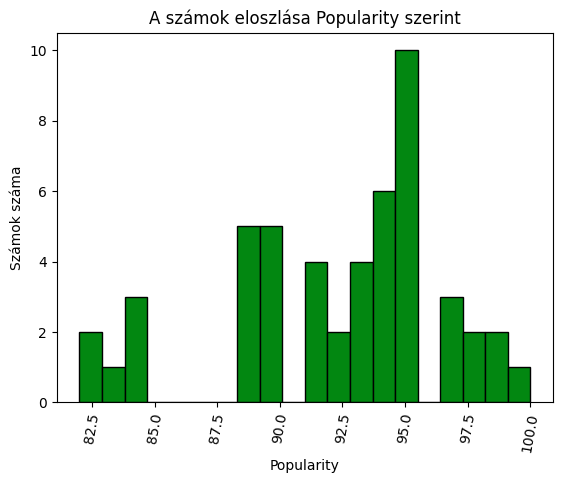

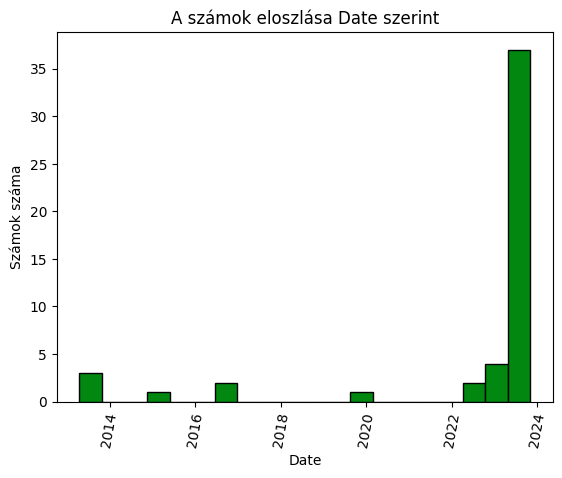

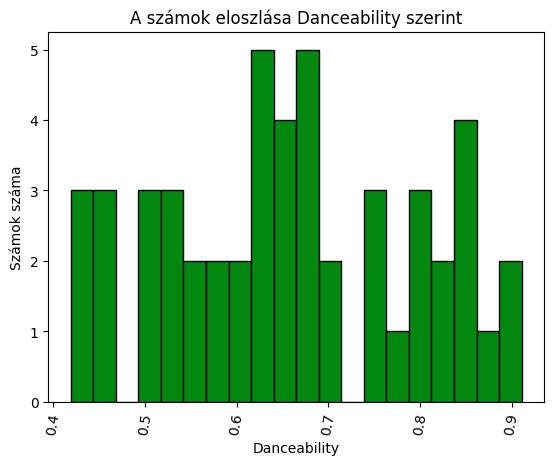

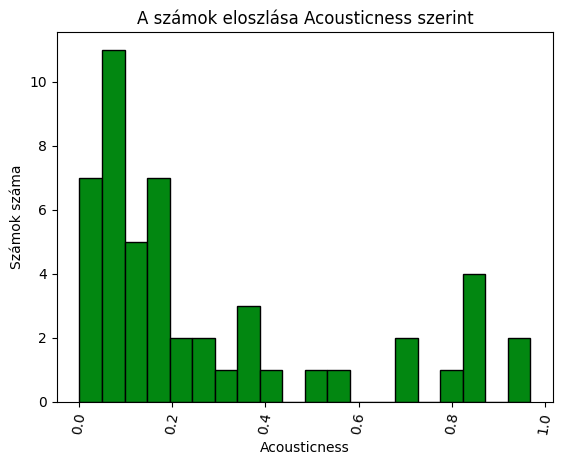

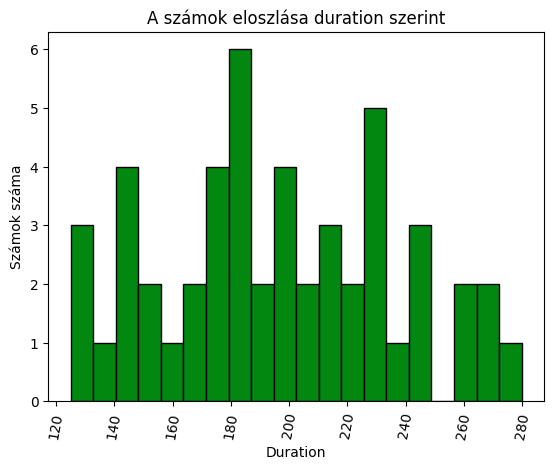

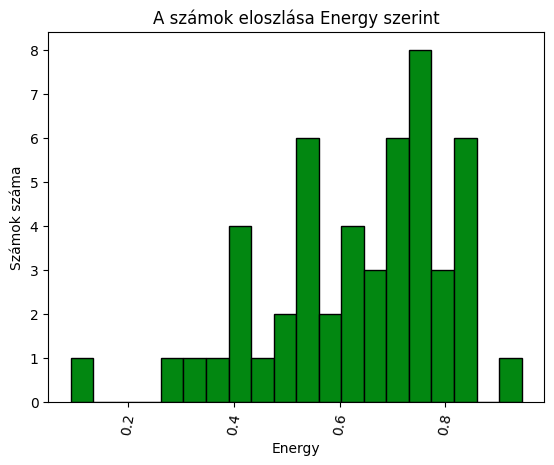

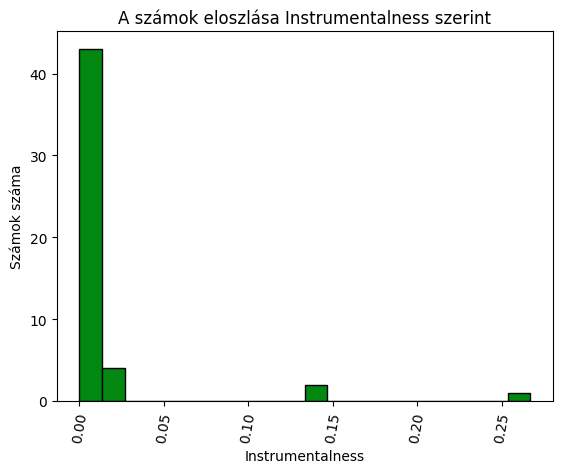

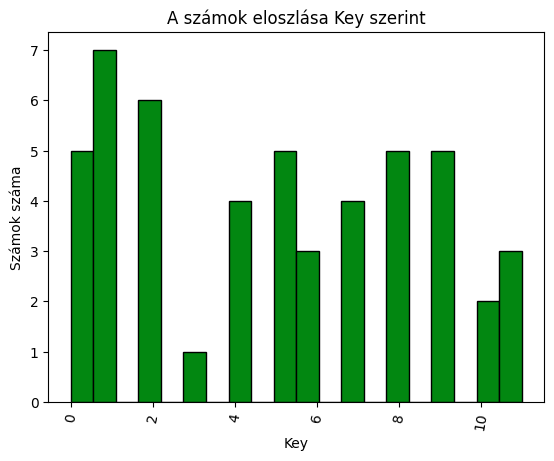

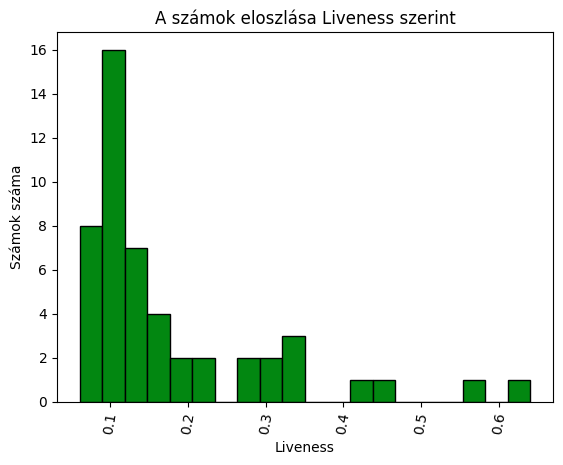

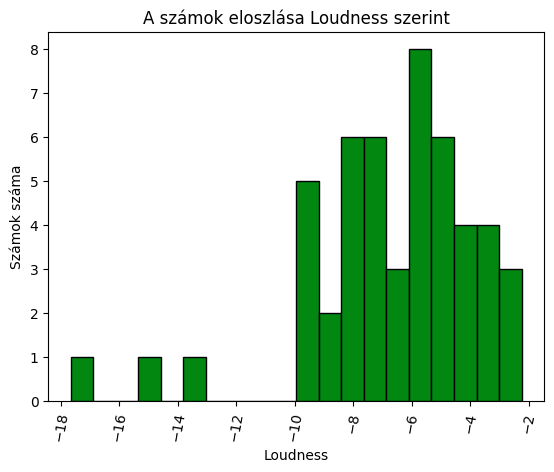

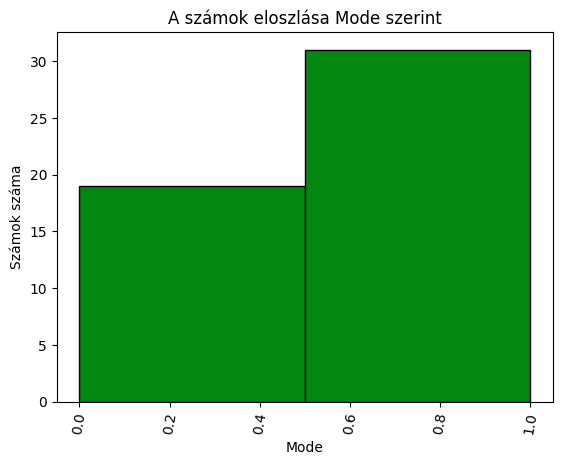

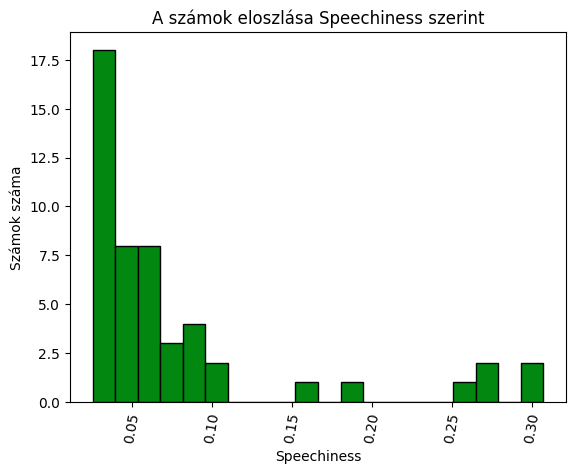

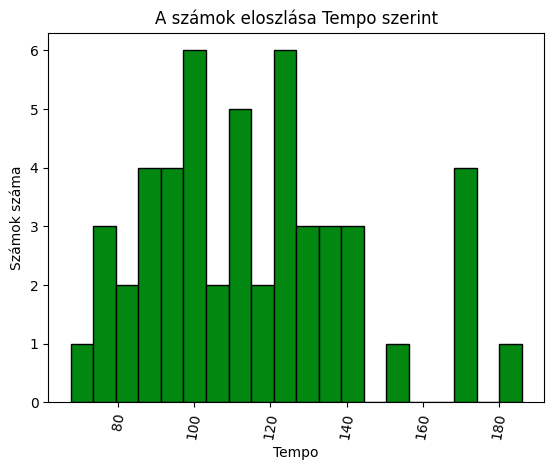

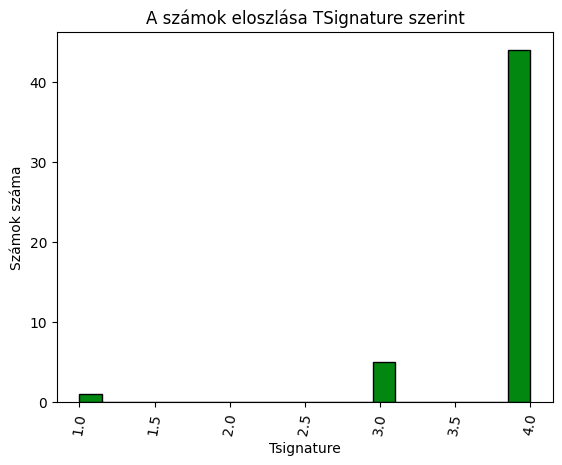

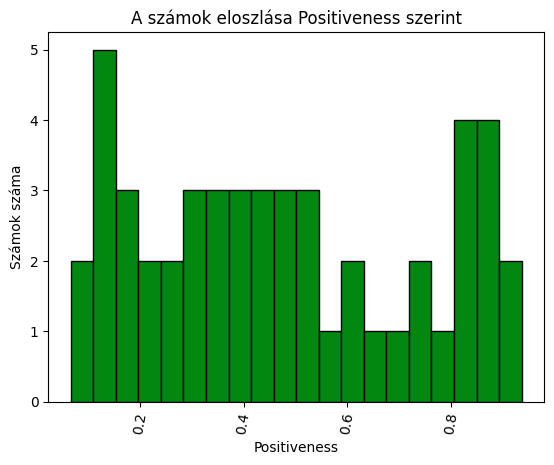

In [64]:

# Country,Track Name,Artist Name,Album Name,Popularity,Date,Markets,Danceability,Acousticness,duration,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,TSignature,Positiveness



attributes = ["Popularity","Date","Danceability","Acousticness","duration","Energy","Instrumentalness","Key","Liveness","Loudness","Mode","Speechiness","Tempo","TSignature","Positiveness"]

for attr in attributes:
	key = attr
	
	if attr == "Mode":
		number_of_bins = 2
	else:
		number_of_bins = 20
	
	plt.hist(dataframe[key], bins=number_of_bins, color="#028711", edgecolor="black")
	plt.xlabel(f"{attr.capitalize()}")
	plt.ylabel("Számok száma")
	plt.xticks(rotation=80, ha="center")
	plt.title(f"A számok eloszlása {key} szerint")
	plt.show()


Az előadók és albumok is elemzésre kerülhetnének de ezt most kihagyjuk mert úgy gondoljuk, hogy túlságosan két külön jellegű irányba vinné a projektet. Itt a fókusz a szám paraméterein kell legyen, nem az előadón.

In [23]:

print("Before Encoding:", dataframe.columns)

# dataframe = dataframe.drop("Track Name")
# dataframe = dataframe.drop(["Artist Name", "Track Name", "Album Name"])
# Nem értem, hogy miért ad hibát a kódom.


# df_encoded = pd.get_dummies(dataframe, columns=["Country", "Markets", "Track Name", "Artist Name", "Album Name"], drop_first=True)

df_encoded = pd.get_dummies(dataframe, drop_first=True, dummy_na=True)
# Parameters: 
# columns
# 	list-like, default None
#	Column names in the DataFrame to be encoded. If columns is None then all the columns with object, string, or category dtype will be converted.


print("After Encoding:", df_encoded.columns)



Before Encoding: Index(['Country', 'Track Name', 'Artist Name', 'Album Name', 'Popularity',
       'Date', 'Markets', 'Danceability', 'Acousticness', 'duration', 'Energy',
       'Instrumentalness', 'Key', 'Liveness', 'Loudness', 'Mode',
       'Speechiness', 'Tempo', 'TSignature', 'Positiveness'],
      dtype='object')
After Encoding: Index(['Popularity', 'Date', 'Danceability', 'Acousticness', 'duration',
       'Energy', 'Instrumentalness', 'Key', 'Liveness', 'Loudness',
       ...
       'Album Name_The Land Is Inhospitable and So Are We', 'Album Name_Water',
       'Album Name_What Was I Made For? [From The Motion Picture "Barbie"]',
       'Album Name_Zach Bryan', 'Album Name_a Gift & a Curse',
       'Album Name_greedy', 'Album Name_nadie sabe lo que va a pasar mañana',
       'Album Name_<NA>', 'Markets_CA', 'Markets_<NA>'],
      dtype='object', length=143)


In [24]:
print(df_encoded.head())

    Popularity       Date  Danceability  Acousticness  duration  Energy  \
2           99 2022-09-23         0.537        0.8270   184.061   0.421   
27          94 2023-08-11         0.638        0.0010   132.359   0.717   
36          93 2023-08-25         0.429        0.5540   227.196   0.453   
11          95 2023-07-28         0.673        0.0856   200.256   0.722   
34          92 2013-06-24         0.445        0.6950   244.360   0.537   

    Instrumentalness  Key  Liveness  Loudness  ...  \
2           0.000000    5    0.1380    -8.720  ...   
27          0.000002    8    0.1130    -5.804  ...   
36          0.000002    0    0.1020    -7.746  ...   
11          0.000000    3    0.1370    -3.495  ...   
34          0.000017    4    0.0944    -8.532  ...   

    Album Name_The Land Is Inhospitable and So Are We  Album Name_Water  \
2                                               False             False   
27                                              False             False   

In [65]:
# Now calculate the correlation matrix
correlation_matrix = df_encoded.corr()

print(correlation_matrix)

                                                Popularity      Date  \
Popularity                                        1.000000 -0.006753   
Date                                             -0.006753  1.000000   
Danceability                                     -0.004876  0.337820   
Acousticness                                     -0.026022 -0.106610   
duration                                         -0.151637 -0.236804   
...                                                    ...       ...   
Album Name_greedy                                 0.251608  0.060966   
Album Name_nadie sabe lo que va a pasar mañana    0.215013  0.114488   
Album Name_<NA>                                        NaN       NaN   
Markets_CA                                       -0.301020 -0.354173   
Markets_<NA>                                           NaN       NaN   

                                                Danceability  Acousticness  \
Popularity                                         -0.004

In [26]:
# Check for NaN or Infinite values
if correlation_matrix.isnull().values.any() or (correlation_matrix == float('inf')).values.any():
    print("Data contains NaN or Infinite values!")
    
print(correlation_matrix.where(lambda col: col.isnull()).count())
print(correlation_matrix.where(lambda col: col == float("inf")).count())
# print(correlation_matrix.values().where(lambda col: math.isinf(col).count()))



Data contains NaN or Infinite values!
Popularity                                        0
Date                                              0
Danceability                                      0
Acousticness                                      0
duration                                          0
                                                 ..
Album Name_greedy                                 0
Album Name_nadie sabe lo que va a pasar mañana    0
Album Name_<NA>                                   0
Markets_CA                                        0
Markets_<NA>                                      0
Length: 143, dtype: int64
Popularity                                        0
Date                                              0
Danceability                                      0
Acousticness                                      0
duration                                          0
                                                 ..
Album Name_greedy                                 0


In [27]:
# from sklearn.preprocessing import StandardScaler

# Scale the correlation matrix to have mean 0 and variance 1
# scaler = StandardScaler()
# correlation_matrix_scaled = scaler.fit_transform(correlation_matrix)

# plt.figure(figsize=(12, 6))
# sns.heatmap(correlation_matrix_scaled, annot=False, cmap="coolwarm")
# plt.title("Scaled Feature Correlation Heatmap")
# plt.xticks(rotation=45, ha="right")
# plt.yticks(rotation=0, va="center")
# plt.show()


                                                Popularity
Artist Name_Jung Kook                            -0.474827
Album Name_GOLDEN                                -0.470382
Track Name_Seven (feat. Latto) (Explicit Ver.)   -0.333527
Track Name_Agora Hills                           -0.333527
Artist Name_Doja Cat                             -0.313995
...                                                    ...
Country_<NA>                                           NaN
Track Name_<NA>                                        NaN
Artist Name_<NA>                                       NaN
Album Name_<NA>                                        NaN
Markets_<NA>                                           NaN

[142 rows x 1 columns]


Text(0.5, 1.0, 'Correlation with Popularity')

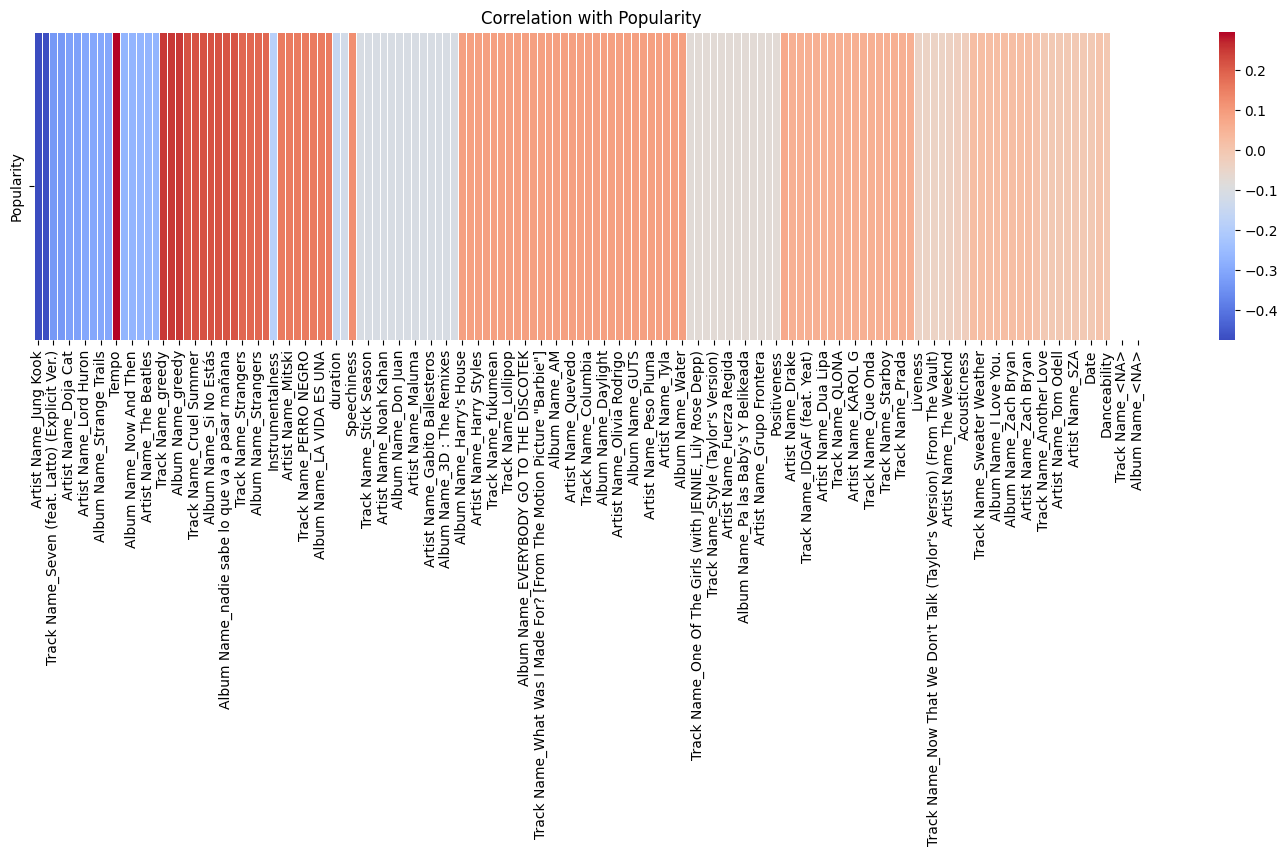

In [28]:
# Select only numeric columns for correlation calculation
# numeric_columns = dataframe.select_dtypes(include=["float64", "int64", "datetime"]).columns


# Compute the correlation matrix for the numeric columns
# correlation_matrix = dataframe[numeric_columns].corr()
# correlation_matrix = df_encoded[numeric_columns].corr()


correlation_matrix = df_encoded.corr()


# Extract the correlation of 'Popularity' with all other columns
popularity_corr = correlation_matrix["Popularity"].drop(["Popularity"])


# Reshape the data to make it suitable for a heatmap
popularity_corr = popularity_corr.to_frame()  # Convert to a DataFrame for better plotting

# Sort correlations by absolute value
popularity_corr = popularity_corr.sort_values(by='Popularity', ascending=False, key=lambda col: col.abs())

print(popularity_corr)

# Plot the heatmap
plt.figure(figsize=(18, 4))
# sns.heatmap(popularity_corr.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
sns.heatmap(popularity_corr.T, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation with Popularity")

## Balra láthatók a népszerűséggel erősen összefüggő tényezők, függgetlenül attól,hogy pozitív vagy negatív a hatásuk. A hatás irányát a szín jelzi.

In [66]:

plt.show()


# Plot the correlation matrix
# plt.figure(figsize=(120, 60))
# sns.heatmap(popularity_corr.T, annot=False, cmap="coolwarm", vmin = -0.3, vmax=0.3)
# plt.title("Feature Correlation Heatmap")
# plt.xticks(rotation=45, ha="right")
# plt.yticks(rotation=0, va="center")
# plt.show()


In [30]:
# Calculating the correlation of column A against all others
# corr_matrix = dataframe.corr()['A']


# f: https://www.geeksforgeeks.org/python-pandas-dataframe-corr/
# To find the correlation among
# the columns using pearson method
# dataframe.corr(method='pearson')

